In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [ ]:
df = pd.read_csv('/content/reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


# **Data Cleaning**

We have several steps to do in cleaning phase
1. Reformat Location column.

2. Reformat Date column.

3. Clean Review text column.

4. Fill null values in Rating column.





## **Location**

In [ ]:
df[['City','State', 'Country']] = df['location'].str.split(',',expand=True)
df.drop(columns=['location','Country','City','Image_Links','name'], inplace=True)
df['State'] = df['State'].str.replace(' ', '')
df.head()

,Date,Rating,Review,State
0,"Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,TX
1,"Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,FL
2,"Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,PA
3,"Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,WA
4,"Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,OR


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    850 non-null    object 
 1   Rating  705 non-null    float64
 2   Review  850 non-null    object 
 3   State   848 non-null    object 
dtypes: float64(1), object(3)
memory usage: 26.7+ KB


In [ ]:
us_states = {
    'AL': 'ALABAMA', 'AK': 'ALASKA', 'AZ': 'ARIZONA', 'AR': 'ARKANSAS', 'CA': 'CALIFORNIA', 'CO': 'COLORADO',
    'CT': 'CONNECTICUT', 'DE': 'DELAWARE', 'FL': 'FLORIDA', 'GA': 'GEORGIA', 'HI': 'HAWAII', 'ID': 'IDAHO',
    'IL': 'ILLINOIS', 'IN': 'INDIANA', 'IA': 'IOWA', 'KS': 'KANSAS', 'KY': 'KENTUCKY', 'LA': 'LOUISIANA',
    'ME': 'MAINE', 'MD': 'MARYLAND', 'MA': 'MASSACHUSETTS', 'MI': 'MICHIGAN', 'MN': 'MINNESOTA', 'MS': 'MISSISSIPPI',
    'MO': 'MISSOURI', 'MT': 'MONTANA', 'NE': 'NEBRASKA', 'NV': 'NEVADA', 'NH': 'NEW HAMPSHIRE', 'NJ': 'NEW JERSEY',
    'NM': 'NEW MEXICO', 'NY': 'NEW YORK', 'NC': 'NORTH CAROLINA', 'ND': 'NORTH DAKOTA', 'OH': 'OHIO', 'OK': 'OKLAHOMA',
    'OR': 'OREGON', 'PA': 'PENNSYLVANIA', 'RI': 'RHODE ISLAND', 'SC': 'SOUTH CAROLINA', 'SD': 'SOUTH DAKOTA',
    'TN': 'TENNESSEE', 'TX': 'TEXAS', 'UT': 'UTAH', 'VT': 'VERMONT', 'VA': 'VIRGINIA', 'WA': 'WASHINGTON',
    'WV': 'WEST VIRGINIA', 'WI': 'WISCONSIN', 'WY': 'WYOMING','KY':'Kentucky','AZ':'Arizona','CA':'California',
    'SC':'South Carolina','TX':'Texas','FL':'Florida','GA':'Georgia'
}

# Function to clean and standardize U.S. states
def clean_location(State):
  if State is None:
        return None
  location_upper = State.upper()
    # Check if it's a valid state abbreviation or name
  if location_upper in us_states:
    return location_upper
  elif location_upper in us_states.values():
    return next(key for key, value in us_states.items() if value == location_upper)
  else:
    return State  # Leave non-U.S. locations unchanged

print(len(us_states))

50


In [ ]:
df['State'] = df['State'].apply(clean_location)

In [ ]:
df.State.unique()

array(['TX', 'FL', 'PA', 'WA', 'OR', 'NC', 'MD', 'Other', 'CA', 'OH',
       'HI', 'NJ', 'GA', 'DC', 'AZ', 'MA', 'VA', 'NV', 'TN', 'IA', 'WI',
       'NH', 'AR', 'MN', 'IN', 'MO', 'IL', 'MI', 'MS', 'CO', 'Canada',
       'OK', 'Ampang', 'UT', 'KY', 'ME', 'KS', 'ON', 'Ontario', 'BC',
       'NY', 'NE', 'AK', 'AB', 'ID', 'OTHER', None, 'LA', 'UK', 'SC',
       'MB', 'SK', 'California', 'WY', 'Saskatchewan', 'SouthCarolina',
       'NL', 'NM', 'Florida', 'Alberta', 'Ala', 'WV', 'Wi.', 'NewYork',
       'NS', 'ND', 'RI', 'AL', 'QC', 'MT', 'CT', 'NOOTHERLINENEEDED',
       'BECCLES', 'LeightonBuzzard', 'other'], dtype=object)

In [ ]:
df = df[~df['State'].str.lower().isin(['other'])]

In [ ]:
df= df.dropna(subset=['State'])

In [ ]:
df.loc[df['State'].str.contains("NewYork"), 'State'] = "NY"
df.loc[df['State'].str.contains("Ala"), 'State'] = "AL"
df.loc[df['State'].str.contains("Florida"), 'State'] = "FL"
df.loc[df['State'].str.contains("Wi."), 'State'] = "WI"
df.loc[df['State'].str.contains("SouthCarolina"), 'State'] = "SC"
df.loc[df['State'].str.contains("California"), 'State'] = "CA"

In [ ]:
values_to_remove = ['NOOTHERLINENEEDED','BECCLES','LeightonBuzzard',
                     'Canada','Ampang','Saskatchewan','Alberta','Ontario','UK']
df = df[~df['State'].isin(values_to_remove)]
df.State.unique()

array(['TX', 'FL', 'PA', 'WA', 'OR', 'NC', 'MD', 'CA', 'OH', 'HI', 'NJ',
       'GA', 'DC', 'AZ', 'MA', 'VA', 'NV', 'TN', 'IA', 'WI', 'NH', 'AR',
       'MN', 'IN', 'MO', 'IL', 'MI', 'MS', 'CO', 'OK', 'UT', 'KY', 'ME',
       'KS', 'ON', 'BC', 'NY', 'NE', 'AK', 'AB', 'ID', 'LA', 'SC', 'MB',
       'SK', 'WY', 'NL', 'NM', 'AL', 'WV', 'NS', 'ND', 'RI', 'QC', 'MT',
       'CT'], dtype=object)

In [ ]:
def check_states(state_list):
    valid_states = {
        "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
        "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
        "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
        "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
        "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
    }

    valid = [state for state in state_list if state in valid_states]
    invalid = [state for state in state_list if state not in valid_states]

    return valid, invalid # Return the two lists

In [ ]:
x = df.State.to_list()
valid, invalid = check_states(x)
print("Invalid states:", invalid)

Invalid states: ['DC', 'ON', 'ON', 'BC', 'ON', 'DC', 'BC', 'BC', 'AB', 'MB', 'SK', 'ON', 'NL', 'BC', 'AB', 'NS', 'ON', 'ON', 'QC', 'AB', 'ON', 'AB', 'BC', 'ON', 'AB', 'ON', 'BC', 'ON', 'ON', 'BC', 'ON', 'NS', 'NS', 'QC', 'DC', 'QC', 'BC', 'AB', 'DC', 'ON', 'AB']


In [ ]:
df = df[~df['State'].isin(invalid)]
len(df.State.unique())

47

In [ ]:
df.head()

,Date,Rating,Review,State
0,"Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,TX
1,"Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,FL
2,"Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,PA
3,"Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,WA
4,"Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,OR


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 849
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    755 non-null    object 
 1   Rating  627 non-null    float64
 2   Review  755 non-null    object 
 3   State   755 non-null    object 
dtypes: float64(1), object(3)
memory usage: 29.5+ KB


In [ ]:
df.head()

,Date,Rating,Review,State
0,"Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,TX
1,"Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,FL
2,"Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,PA
3,"Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,WA
4,"Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,OR


## **Date**

In [ ]:
chars_to_remove = 'Reviewed'
df['Date'] = df['Date'].str.replace(f"[{chars_to_remove}]", "", regex=True)
df['Date'] = df['Date'].str.replace('.', '')
df.head()

,Date,Rating,Review,State
0,"Spt 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,TX
1,"July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,FL
2,"July 5, 2023",5.0,I just wanted to go out of my way to recognize...,PA
3,"May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,WA
4,"Jan 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,OR


In [ ]:
df.Date.unique()

array([' Spt 13, 2023', ' July 16, 2023', ' July 5, 2023',
       ' May 26, 2023', ' Jan 22, 2023', ' Spt 14, 2023', ' Spt 8, 2023',
       ' Aug 25, 2023', ' Aug 5, 2023', ' July 27, 2023',
       ' July 21, 2023', ' July 6, 2023', ' Jun 3, 2023', ' May 22, 2023',
       ' May 15, 2023', ' May 11, 2023', ' Aprl 30, 2023',
       ' Aprl 28, 2023', ' Aprl 20, 2023', ' March 30, 2023',
       ' March 3, 2023', ' Fb 22, 2023', ' Fb 19, 2023', ' Fb 9, 2023',
       ' Fb 5, 2023', ' Fb 4, 2023', ' Fb 1, 2023', ' Jan 30, 2023',
       ' Jan 1, 2023', ' Dc 13, 2022', ' No 29, 2022', ' No 17, 2022',
       ' No 11, 2022', ' No 10, 2022', ' No 6, 2022', ' Oct 29, 2022',
       ' Oct 26, 2022', ' Oct 21, 2022', ' Oct 10, 2022', ' Oct 8, 2022',
       ' Spt 29, 2022', ' Spt 23, 2022', ' Aug 27, 2022', ' Aug 7, 2022',
       ' Aug 1, 2022', ' July 18, 2022', ' July 16, 2022',
       ' July 13, 2022', ' July 9, 2022', ' Jun 27, 2022',
       ' Jun 25, 2022', ' Jun 17, 2022', ' Jun 15, 2022', ' Jun 

In [ ]:
month_corrections = {
    'Sept': 'Sep',
    'Spt':'Sep',
    'Dc': 'Dec',
    'No.': 'Nov',
    'No' :'Nov',
    'March': 'Mar',
    'July' : 'Jul',
    'June' : 'Jun',
    'Aprl' : 'Apr',
    'Fb' : 'Feb'
}

# Function to clean and convert dates
def clean_date(date_str):
    for incorrect, correct in month_corrections.items():
        date_str = date_str.replace(incorrect, correct)
    return pd.to_datetime(date_str, errors='coerce')

# Apply the function to the date column
df['Date'] = df['Date'].apply(clean_date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 849
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    755 non-null    datetime64[ns]
 1   Rating  627 non-null    float64       
 2   Review  755 non-null    object        
 3   State   755 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 29.5+ KB


In [ ]:
df.head()

,Date,Rating,Review,State
0,2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...,TX
1,2023-07-16,5.0,** at the Starbucks by the fire station on 436...,FL
2,2023-07-05,5.0,I just wanted to go out of my way to recognize...,PA
3,2023-05-26,5.0,Me and my friend were at Starbucks and my card...,WA
4,2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...,OR


**NOTE:**
 ---
Cleaning text will be before full null values in Rating coulmn. The reason is beacues i want to get sentiment of every review and get the mean of every sentiment and full the nulls based on this.


Also I noticed on excel that there are many rows that got 'No Review Text'.
Those must be deleted

## **Text Cleaning**

In [ ]:
df = df[df['Review'] != 'No Review Text']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 0 to 847
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    719 non-null    datetime64[ns]
 1   Rating  625 non-null    float64       
 2   Review  719 non-null    object        
 3   State   719 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 28.1+ KB


### **Removing Stop Words**

In [ ]:
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)


df['Review'] = df['Review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Removing URLs, Emojis, Non-Alphabetic characters**

In [ ]:
def clean_review(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [ ]:
df['Review'] = df['Review'].apply(clean_review)
df.head()

,Date,Rating,Review,State
0,2023-09-13,5.0,amber ladonna starbucks southwest parkway alwa...,TX
1,2023-07-16,5.0,starbucks fire station altamonte springs fl ...,FL
2,2023-07-05,5.0,wanted go way recognize starbucks employee bil...,PA
3,2023-05-26,5.0,friend starbucks card didnt work thankful work...,WA
4,2023-01-22,5.0,im kick drinking cups warm water work instaca...,OR


### **Getting the sentiment of every review**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
df.head()

,Date,Rating,Review,State,Sentiment_Score,Sentiment
0,2023-09-13,5.0,amber ladonna starbucks southwest parkway alwa...,TX,0.8779,Positive
1,2023-07-16,5.0,starbucks fire station altamonte springs fl ...,FL,0.9670,Positive
2,2023-07-05,5.0,wanted go way recognize starbucks employee bil...,PA,0.4215,Positive
3,2023-05-26,5.0,friend starbucks card didnt work thankful work...,WA,0.7241,Positive
4,2023-01-22,5.0,im kick drinking cups warm water work instaca...,OR,0.9714,Positive


### **Most repeated words in dataset**

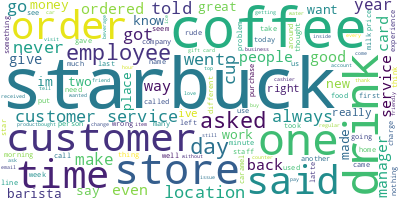

In [ ]:
from wordcloud import WordCloud
long_string = ','.join(list(df['Review'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

### **Getting sentiment distribution**

In [ ]:
df.Sentiment.value_counts()

,count
Sentiment,
Positive,403
Negative,292
Neutral,24


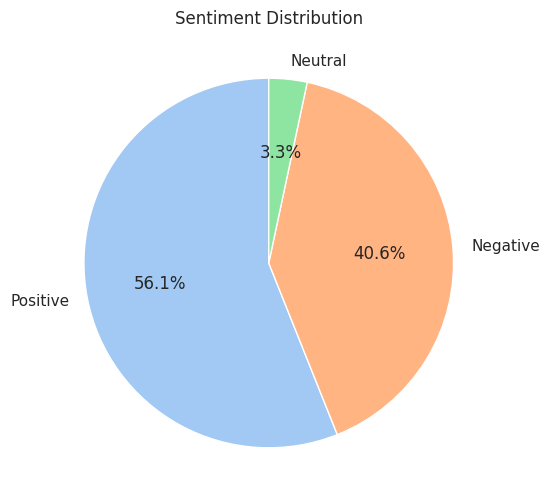

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
df.groupby('Sentiment')['Rating'].mean()

,Rating
Sentiment,
Negative,1.316000
Neutral,1.611111
Positive,2.263305


### **Filling Rating nulls**

Now we can fill Nulls with the mean rating of every sentiment with a little edit:
1. Positive: 3
2. Neative: 1
3. Neutral: 2

In [ ]:
def fill_ratings(row):
  if pd.isnull(row['Rating']):
    if row['Sentiment'] =='Positive':
      return 3
    elif row['Sentiment'] =='Negative':
      return 1
    elif row['Sentiment'] =='Neutral':
      return 2
  else:
    return row['Rating']

df['Rating'] = df.apply(fill_ratings, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 0 to 847
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             719 non-null    datetime64[ns]
 1   Rating           719 non-null    float64       
 2   Review           719 non-null    object        
 3   State            719 non-null    object        
 4   Sentiment_Score  719 non-null    float64       
 5   Sentiment        719 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 39.3+ KB


In [ ]:
df.head()

,Date,Rating,Review,State,Sentiment_Score,Sentiment
0,2023-09-13,5.0,amber ladonna starbucks southwest parkway alwa...,TX,0.8779,Positive
1,2023-07-16,5.0,starbucks fire station altamonte springs fl ...,FL,0.9670,Positive
2,2023-07-05,5.0,wanted go way recognize starbucks employee bil...,PA,0.4215,Positive
3,2023-05-26,5.0,friend starbucks card didnt work thankful work...,WA,0.7241,Positive
4,2023-01-22,5.0,im kick drinking cups warm water work instaca...,OR,0.9714,Positive


In [ ]:
df.to_csv('cleaned_data.csv', index=False)
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('/content/cleaned_data.csv')
df.head()

,name,Date,Rating,Review,State,sentiment
0,Helen,2023-09-13,5.0,amber and ladonna at the starbucks on southwes...,TX,positive
1,Courtney,2023-07-16,5.0,at the starbucks by the fire station on in a...,FL,positive
2,Daynelle,2023-07-05,5.0,i just wanted to go out of my way to recognize...,PA,negative
3,Taylor,2023-05-26,5.0,me and my friend were at starbucks and my card...,WA,positive
4,Tenessa,2023-01-22,5.0,im on this kick of drinking cups of warm wate...,OR,positive


### **Enhancing states names and gitting year,month,day**

In [3]:
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

print(len(state_names))

50


In [4]:
df['State'] = df['State'].map(state_names)

In [5]:
df.State.value_counts()

,count
State,
California,182
Florida,48
Texas,42
New York,38
Washington,38
North Carolina,27
Georgia,27
Illinois,27
Arizona,25


In [6]:
df.head()

,name,Date,Rating,Review,State,sentiment
0,Helen,2023-09-13,5.0,amber and ladonna at the starbucks on southwes...,Texas,positive
1,Courtney,2023-07-16,5.0,at the starbucks by the fire station on in a...,Florida,positive
2,Daynelle,2023-07-05,5.0,i just wanted to go out of my way to recognize...,Pennsylvania,negative
3,Taylor,2023-05-26,5.0,me and my friend were at starbucks and my card...,Washington,positive
4,Tenessa,2023-01-22,5.0,im on this kick of drinking cups of warm wate...,Oregon,positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       755 non-null    object 
 1   Date       755 non-null    object 
 2   Rating     755 non-null    float64
 3   Review     755 non-null    object 
 4   State      755 non-null    object 
 5   sentiment  755 non-null    object 
dtypes: float64(1), object(5)
memory usage: 35.5+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,name,Date,Rating,Review,State,sentiment,Year,Month,Day
0,Helen,2023-09-13,5.0,amber and ladonna at the starbucks on southwes...,Texas,positive,2023,9,13
1,Courtney,2023-07-16,5.0,at the starbucks by the fire station on in a...,Florida,positive,2023,7,16
2,Daynelle,2023-07-05,5.0,i just wanted to go out of my way to recognize...,Pennsylvania,negative,2023,7,5
3,Taylor,2023-05-26,5.0,me and my friend were at starbucks and my card...,Washington,positive,2023,5,26
4,Tenessa,2023-01-22,5.0,im on this kick of drinking cups of warm wate...,Oregon,positive,2023,1,22


# **Data Analysis**

## **Rating disribution**

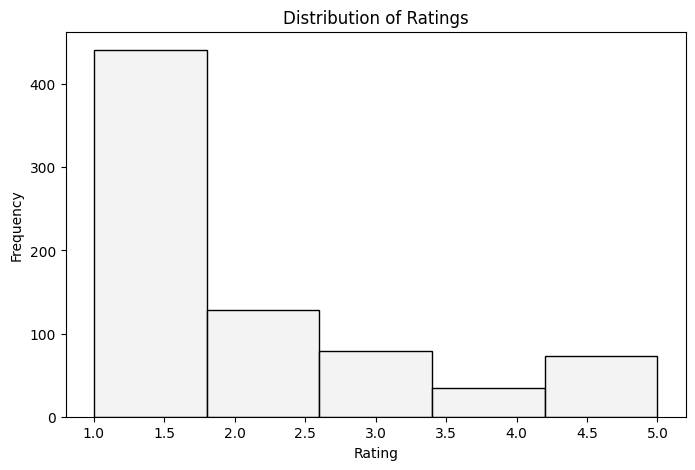

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=5,color='#f0f0f0',)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

We observe that while positive sentiments were most frequent, the number of low ratings (1 star) is unexpectedly high. This suggests that some users may rate poorly despite unclear reviews, or it could indicate spam intended to harm the brand.

## **Average rating by states**

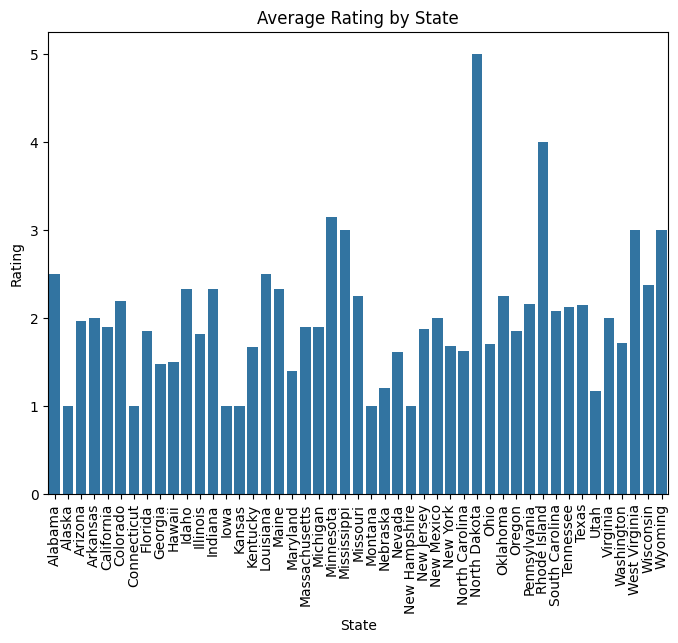

In [ ]:
state_avg = df.groupby('State')['Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='State',y='Rating',data=state_avg)
plt.title('Average Rating by State')
plt.xticks(rotation=90)
plt.show()

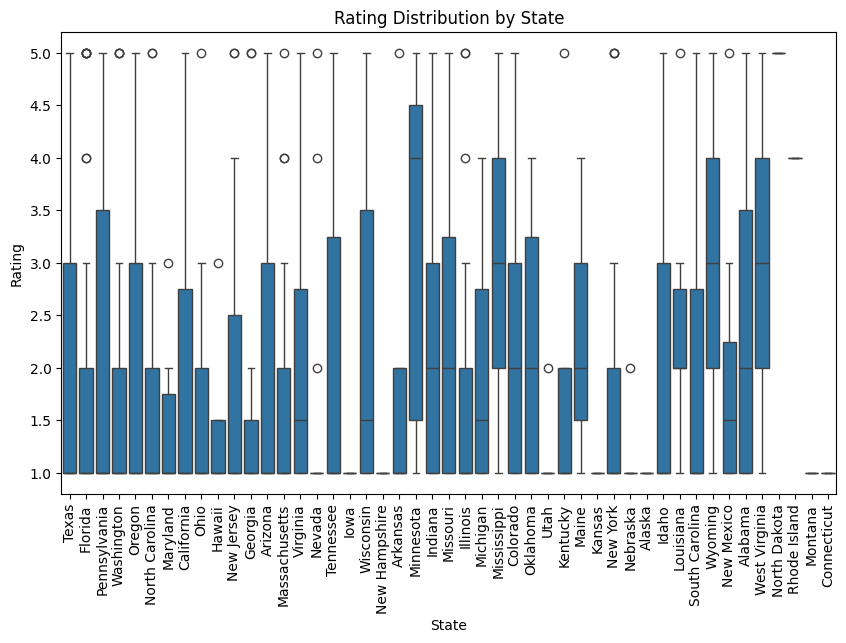

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Rating', data=df)
plt.title('Rating Distribution by State')
plt.xticks(rotation=90)
plt.show()

In [ ]:
rating_state_df = df[['Rating', 'State']]
rating_state_df.head()


,Rating,State
0,5.0,Texas
1,5.0,Florida
2,5.0,Pennsylvania
3,5.0,Washington
4,5.0,Oregon


<ipython-input-119-cd51f3ab5954>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_state_df['State'] = rating_state_df['State'].str.title()
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


States in rating_state_df: ['Texas' 'Florida' 'Pennsylvania' 'Washington' 'Oregon' 'North Carolina'
 'Maryland' 'California' 'Ohio' 'Hawaii' 'New Jersey' 'Georgia' 'Arizona'
 'Massachusetts' 'Virginia' 'Nevada' 'Tennessee' 'Iowa' 'Wisconsin'
 'New Hampshire' 'Arkansas' 'Minnesota' 'Indiana' 'Missouri' 'Illinois'
 'Michigan' 'Mississippi' 'Colorado' 'Oklahoma' 'Utah' 'Kentucky' 'Maine'
 'Kansas' 'New York' 'Nebraska' 'Alaska' 'Idaho' 'Louisiana'
 'South Carolina' 'Wyoming' 'New Mexico' 'Alabama' 'West Virginia'
 'North Dakota' 'Rhode Island' 'Montana' 'Connecticut']
States in us_states: ['Mississippi' 'North Carolina' 'Oklahoma' 'Virginia' 'West Virginia'
 'Louisiana' 'Michigan' 'Massachusetts' 'Idaho' 'Florida' 'Nebraska'
 'Washington' 'New Mexico' 'South Dakota' 'Texas' 'California' 'Alabama'
 'Georgia' 'Pennsylvania' 'Missouri' 'Colorado' 'Utah' 'Tennessee'
 'Wyoming' 'New York' 'Kansas' 'Nevada' 'Illinois' 'Vermont' 'Montana'
 'Iowa' 'South Carolina' 'New Hampshire' 'Arizona' 'Distr

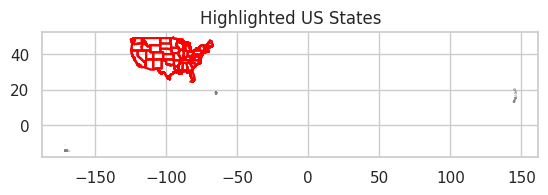

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset with state-level data
states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# Filter for the contiguous US states
us_states = states[~states['STUSPS'].isin(['AK', 'HI', 'PR'])]

# Ensure consistent capitalization for state names
rating_state_df['State'] = rating_state_df['State'].str.title()
us_states['NAME'] = us_states['NAME'].str.title()

# Print unique state names for debugging
print("States in rating_state_df:", rating_state_df['State'].unique())
print("States in us_states:", us_states['NAME'].unique())

# Filter states from your DataFrame
highlighted_states = us_states[us_states['NAME'].isin(rating_state_df['State'])]

# Check if highlighted_states is empty and handle accordingly
if highlighted_states.empty:
    print("No matching states found. Please check the state names.")
else:
    # Plot
    base = us_states.boundary.plot(color='gray')
    highlighted_states.boundary.plot(ax=base, color='red')
    plt.title('Highlighted US States')
    plt.show()

In [ ]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
    "Connecticut","Delaware","Florida","Georgia","Idaho","Illinois","Indiana",
    "Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts",
    "Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska",
    "Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina",
    "North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island",
    "South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont",
    "Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

all_state_df = pd.DataFrame(states, columns=["State"])


### **States with ranking distribution**

In [ ]:
best_rank = df[df['Rating'] > 4]
high_rank = df[(df['Rating'] <= 4) & (df['Rating'] > 3)]
medium_rank = df[(df['Rating'] <= 3) & (df['Rating'] > 2)]
low_rank = df[df['Rating'] <= 2]

In [ ]:
# Filter states for each rank
best_rank = df[df['Rating'] > 4]
remaining_df = df[~df['State'].isin(best_rank['State'])]

high_rank = remaining_df[(remaining_df['Rating'] <= 4) & (remaining_df['Rating'] > 3)]
remaining_df = remaining_df[~remaining_df['State'].isin(high_rank['State'])]

medium_rank = remaining_df[(remaining_df['Rating'] <= 3) & (remaining_df['Rating'] > 2)]
remaining_df = remaining_df[~remaining_df['State'].isin(medium_rank['State'])]

low_rank = remaining_df[remaining_df['Rating'] <= 2]

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset with state-level data
states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

us_states = states[~states['STUSPS'].isin(['AK', 'HI', 'PR'])]
all_states = us_states[us_states['NAME'].isin(all_state_df['State'])]
best_states = us_states[us_states['NAME'].isin(best_rank['State'])]
high_states = us_states[us_states['NAME'].isin(high_rank['State'])]
medium_states = us_states[us_states['NAME'].isin(medium_rank['State'])]
low_states =us_states[us_states['NAME'].isin(low_rank['State'])]

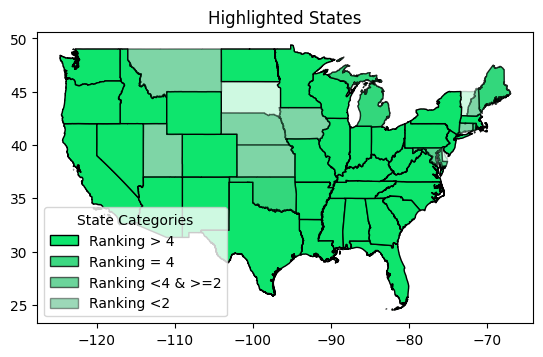

In [ ]:
from matplotlib.patches import Patch
fig, ax = plt.subplots()
gdf_all_states = gpd.GeoDataFrame(all_states)
gdf_best_states = gpd.GeoDataFrame(best_states)
gdf_high_states = gpd.GeoDataFrame(high_states)
gdf_medium_states = gpd.GeoDataFrame(medium_states)
gdf_low_states = gpd.GeoDataFrame(low_states)
gdf_all_states.plot(ax=ax, color='#0ee56d', edgecolor='black', alpha=0.2)
gdf_best_states.plot(ax=ax, color='#0ee56d', edgecolor='black', alpha=1.0)
gdf_high_states.plot(ax=ax, color='#0ccf63', edgecolor='black', alpha=0.8)
gdf_medium_states.plot(ax=ax, color='#0ab859', edgecolor='black', alpha=0.6)
gdf_low_states.plot(ax=ax, color='#089f4f', edgecolor='black', alpha=0.4)
plt.title('Highlighted States')

legend_labels = [
    Patch(facecolor='#0ee56d', edgecolor='black', label='Ranking > 4', alpha=1.0),
    Patch(facecolor='#0ccf63', edgecolor='black', label='Ranking = 4', alpha=0.8),
    Patch(facecolor='#0ab859', edgecolor='black', label='Ranking <4 & >=2', alpha=0.6),
    Patch(facecolor='#089f4f', edgecolor='black', label='Ranking <2', alpha=0.4)
]

plt.legend(handles=legend_labels, title="State Categories",loc='lower left')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       755 non-null    object        
 1   Date       755 non-null    datetime64[ns]
 2   Rating     755 non-null    float64       
 3   Review     755 non-null    object        
 4   State      755 non-null    object        
 5   sentiment  755 non-null    object        
 6   Year       755 non-null    int32         
 7   Month      755 non-null    int32         
 8   Day        755 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 44.4+ KB


## **Year that got best ranking**

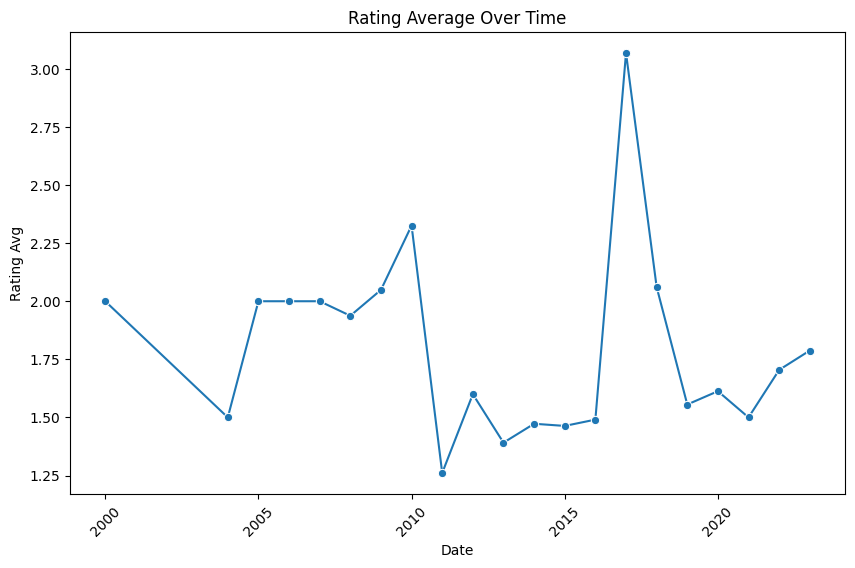

In [ ]:
# df['Year'] = pd.to_datetime(df['Year'], format='%Y')
rating_avg = df.groupby('Year')['Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Rating', data=rating_avg, marker='o')
plt.title('Rating Average Over Time')
plt.xlabel('Date')
plt.ylabel('Rating Avg')
plt.xticks(rotation=45)
plt.show()

2017 was the best year in ratings

In [ ]:
new_df = df[df['Year'] == 2017]

In [ ]:
new_df.head()

,name,Date,Rating,Review,State,sentiment,Year,Month,Day
232,Gina,2017-12-31,5.0,it was a good introduction to the world of cof...,Wyoming,positive,2017,12,31
233,Kathryn,2017-12-30,5.0,the coffee drinks are the best in this area th...,California,positive,2017,12,30
234,Janice,2017-12-29,4.0,i like starbucks their restaurants are clean q...,California,positive,2017,12,29
235,natesha,2017-12-28,4.0,expensive but good drink i like the food but n...,Virginia,positive,2017,12,28
236,Bridget,2017-12-27,4.0,i feel that they have more breakfast items tha...,Virginia,positive,2017,12,27


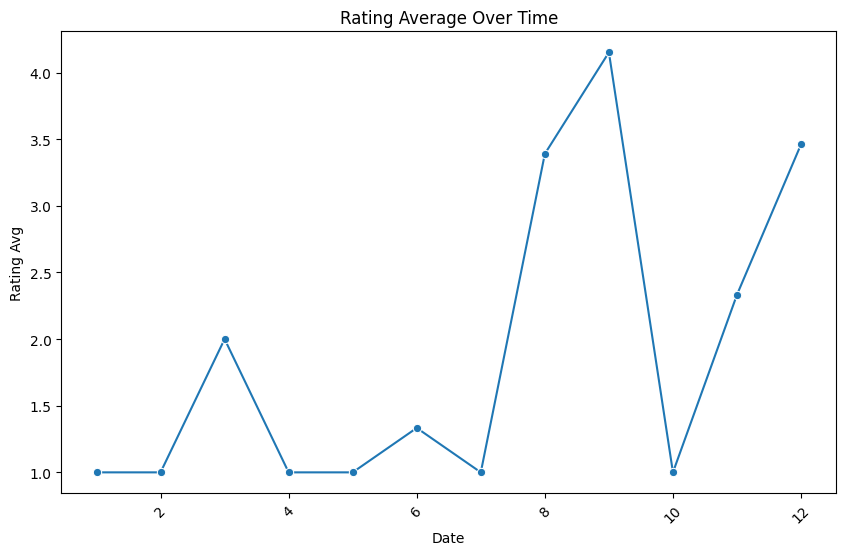

In [ ]:
# new_df['Month'] = pd.to_datetime(new_df['Month'], format='%M')
rating_avg = new_df.groupby('Month')['Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Rating', data=rating_avg, marker='o')
plt.title('Rating Average Over Time')
plt.xlabel('Date')
plt.ylabel('Rating Avg')
plt.xticks(rotation=45)
plt.show()

August and September 2017 was the hights ratings

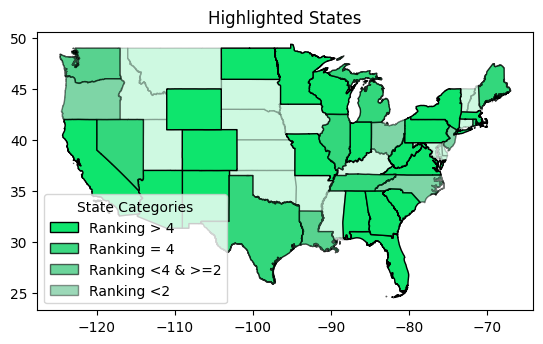

In [ ]:
# Filter states for each rank
best_rank = new_df[new_df['Rating'] > 4]
remaining_df = new_df[~new_df['State'].isin(best_rank['State'])]

high_rank = remaining_df[(remaining_df['Rating'] <= 4) & (remaining_df['Rating'] > 3)]
remaining_df = remaining_df[~remaining_df['State'].isin(high_rank['State'])]

medium_rank = remaining_df[(remaining_df['Rating'] <= 3) & (remaining_df['Rating'] > 2)]
remaining_df = remaining_df[~remaining_df['State'].isin(medium_rank['State'])]

low_rank = remaining_df[remaining_df['Rating'] <= 2]


import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset with state-level data
states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

us_states = states[~states['STUSPS'].isin(['AK', 'HI', 'PR'])]
all_states = us_states[us_states['NAME'].isin(all_state_df['State'])]
best_states = us_states[us_states['NAME'].isin(best_rank['State'])]
high_states = us_states[us_states['NAME'].isin(high_rank['State'])]
medium_states = us_states[us_states['NAME'].isin(medium_rank['State'])]
low_states =us_states[us_states['NAME'].isin(low_rank['State'])]

from matplotlib.patches import Patch
fig, ax = plt.subplots()
gdf_all_states = gpd.GeoDataFrame(all_states)
gdf_best_states = gpd.GeoDataFrame(best_states)
gdf_high_states = gpd.GeoDataFrame(high_states)
gdf_medium_states = gpd.GeoDataFrame(medium_states)
gdf_low_states = gpd.GeoDataFrame(low_states)
gdf_all_states.plot(ax=ax, color='#0ee56d', edgecolor='black', alpha=0.2)
gdf_best_states.plot(ax=ax, color='#0ee56d', edgecolor='black', alpha=1.0)
gdf_high_states.plot(ax=ax, color='#0ccf63', edgecolor='black', alpha=0.8)
gdf_medium_states.plot(ax=ax, color='#0ab859', edgecolor='black', alpha=0.6)
gdf_low_states.plot(ax=ax, color='#089f4f', edgecolor='black', alpha=0.4)
plt.title('Highlighted States')

legend_labels = [
    Patch(facecolor='#0ee56d', edgecolor='black', label='Ranking > 4', alpha=1.0),
    Patch(facecolor='#0ccf63', edgecolor='black', label='Ranking = 4', alpha=0.8),
    Patch(facecolor='#0ab859', edgecolor='black', label='Ranking <4 & >=2', alpha=0.6),
    Patch(facecolor='#089f4f', edgecolor='black', label='Ranking <2', alpha=0.4)
]

plt.legend(handles=legend_labels, title="State Categories",loc='lower left')
plt.show()

## **Topic Modeling**

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)


df['Review'] = df['Review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
def remove_stopwords(text):

  # Tokenize the text
  words = word_tokenize(text)

  # Get the list of stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  filtered_words = [word for word in words if word.lower() not in stop_words]

  # Join words back into a string
  filtered_text = ' '.join(filtered_words)
  return filtered_text

df['Review'] = df['Review'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
best_rank = df[df['Rating'] >= 4]

In [17]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(best_rank['Review'])

In [18]:
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
topic_model_1 = lda_model.fit_transform(X)

In [19]:
def print_top_words(model, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    print("Topics for positive reviews")
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda_model, vectorizer)

Topics for positive reviews
Topic #1:
worth product espresso best crunch wade hampton greer anywhere south
Topic #2:
could use premade around boxes tell lower price healthy usually
Topic #3:
the and to is starbucks they my have of coffee
Topic #4:
great food daily chain customers of you place soon grande
Topic #5:
serve yogurt are excellent such consistently light latte consistent courteous


### Topic #1
- **Keywords:** coffee, starbucks, great, order, always, every, work, service, time, consistent
- **Interpretation:** This topic likely focuses on the consistent quality and service at Starbucks. Customers appreciate the reliability and efficiency in fulfilling orders.

### Positive Aspects:
- Consistent service
- Great coffee
- Reliable orders

### Topic #2
- **Keywords:** always, starbucks, product, get, team, orbitz, try, card, one, good
- **Interpretation:** This topic may highlight the positive interaction with products and services, possibly mentioning loyalty programs or partnerships like Orbitz.

### Positive Aspects:
- Good products
- Positive team interactions
- Loyalty programs

### Topic #3
- **Keywords:** like, food, drinks, items, coffee, choices, starbucks, also, love, great
- **Interpretation:** This topic suggests a variety of choices in food and drinks that customers enjoy. It emphasizes the love for the diverse offerings.

### Positive Aspects:
- Variety of choices
- Great food and drinks
- Love for offerings

### Topic #4
- **Keywords:** always, store, drink, get, starbucks, place, service, best, coffee, take
- **Interpretation:** This topic centers around the positive atmosphere and excellent service at Starbucks locations, highlighting it as a go-to place for good coffee.

### Positive Aspects:
- Excellent service
- Best coffee
- Great atmosphere

### Topic #5
- **Keywords:** starbucks, way, always, store, drinks, good, service, helpful, customer, like
- **Interpretation:** This topic emphasizes the helpfulness of staff and the overall good service, making it a pleasant experience for customers.

### Positive Aspects:
- Helpful staff
- Good service
- Positive customer experience


In [ ]:
bad_rank = df[df['Rating'] < 3]

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(bad_rank['Review'])

In [ ]:
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
topic_model_1 = lda_model.fit_transform(X)

In [ ]:
def print_top_words(model, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    print("Topics for positive reviews")
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda_model, vectorizer)

Topics for positive reviews
Topic #1:
balance site fall reload muffin account visa entering password indigestion
Topic #2:
text review organic gentleman certain oven gross cart win camera
Topic #3:
pastry benefits smoothie wash increase sending quantity support troops ohio
Topic #4:
bacon holiday prizes workers cooked flies refills support weak medium
Topic #5:
starbucks coffee drink customer get one store time said card


### Topic #1
- **Keywords:** balance, site, fall, reload, muffin, account, visa, entering, password, indigestion
- **Interpretation:** This topic may relate to issues with reloading accounts or using the site, possibly causing frustration. Indigestion suggests possible dissatisfaction with certain food items like muffins.

### Negative Aspects:
- Difficulties with site/account balance
- Issues with reloading accounts
- Possible indigestion from muffins

### Topic #2
- **Keywords:** text, review, organic, gentleman, certain, oven, gross, cart, win, camera
- **Interpretation:** This topic hints at dissatisfaction with certain organic products or the shopping experience, possibly involving "gross" items.

### Negative Aspects:
- Dislike for certain organic products
- Issues with shopping experience
- Complaints about product quality

### Topic #3
- **Keywords:** pastry, benefits, smoothie, wash, increase, sending, quantity, support, troops, ohio
- **Interpretation:** This topic might involve dissatisfaction with the quantity of products like pastries or smoothies, or issues with promotional benefits.

### Negative Aspects:
- Insufficient quantity of items
- Issues with promotional benefits
- Dissatisfaction with smoothies or pastries

### Topic #4
- **Keywords:** bacon, holiday, prizes, workers, cooked, flies, refills, support, weak, medium
- **Interpretation:** This topic could indicate problems with food quality (e.g., bacon not cooked well) or issues with service, such as slow refills or weak support.

### Negative Aspects:
- Poorly cooked food items
- Slow service for refills
- Weak customer support

### Topic #5
- **Keywords:** starbucks, coffee, drink, customer, get, one, store, time, said, card
- **Interpretation:** This topic may highlight issues with customer service or problems with using cards at the store.

### Negative Aspects:
- Customer service issues
- Problems with card usage
- Delays or inefficiencies in service


In [ ]:
bes_year_df = df[df['Year'] == 2017]

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(bes_year_df['Review'])

In [ ]:
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
topic_model_1 = lda_model.fit_transform(X)

In [ ]:
def print_top_words(model, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    print("Topics for positive reviews")
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda_model, vectorizer)

Topics for positive reviews
Topic #1:
always good starbucks coffee go much service food never great
Topic #2:
coffee starbucks like sandwich bitter lunch menu would always full
Topic #3:
starbucks like coffee great get customer service order time good
Topic #4:
service starbucks use customer staff drink get could good card
Topic #5:
starbucks coffee tea store excellent service food going drinks go
